In [1]:
import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\Yibabe\Desktop\10academyAIMweek-6\data\cleaned.csv')

In [12]:
df.head()

,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
4,5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0


In [5]:
df.describe()

,Unnamed: 0,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,64273.000000,64273.0,64273.000000,64273.000000,64273.000000,64273.000000
mean,47378.207194,256.0,597.491746,794.924898,2.176871,0.000031
std,27781.143523,0.0,931.377974,772.697956,0.609512,0.005578
min,0.000000,256.0,-3600.000000,2.000000,0.000000,0.000000
25%,23996.000000,256.0,-50.000000,50.000000,2.000000,0.000000
50%,46396.000000,256.0,500.000000,900.000000,2.000000,0.000000
75%,71084.000000,256.0,1000.000000,1000.000000,2.000000,0.000000
max,95661.000000,256.0,3629.000000,3629.000000,4.000000,1.000000


In [3]:
df.columns

Index(['Unnamed: 0', 'TransactionId', 'BatchId', 'AccountId', 'SubscriptionId',
       'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [19]:
# ChannelId - check categories
df.stb.freq(['ChannelId'], style = True)

,ChannelId,count,percent,cumulative_count,cumulative_percent
0,ChannelId_3,"35,303",54.93%,"35,303",54.93%
1,ChannelId_2,"28,035",43.62%,"63,338",98.55%
2,ChannelId_5,684,1.06%,"64,022",99.61%
3,ChannelId_1,251,0.39%,"64,273",100.00%


In [21]:
# ProductId - check categories
df.stb.freq(['ProductId'], style = True)

,ProductId,count,percent,cumulative_count,cumulative_percent
0,ProductId_6,"27,784",43.23%,"27,784",43.23%
1,ProductId_3,"18,426",28.67%,"46,210",71.90%
2,ProductId_10,"8,105",12.61%,"54,315",84.51%
3,ProductId_15,"3,624",5.64%,"57,939",90.15%
4,ProductId_1,"2,006",3.12%,"59,945",93.27%
5,ProductId_4,"1,749",2.72%,"61,694",95.99%
6,ProductId_11,"1,153",1.79%,"62,847",97.78%
7,ProductId_19,540,0.84%,"63,387",98.62%
8,ProductId_14,528,0.82%,"63,915",99.44%
9,ProductId_2,201,0.31%,"64,116",99.76%


In [20]:
# ProductCategory - check categories
df.stb.freq(['ProductCategory'], style = True)

,ProductCategory,count,percent,cumulative_count,cumulative_percent
0,financial_services,"31,948",49.71%,"31,948",49.71%
1,airtime,"30,295",47.13%,"62,243",96.84%
2,data_bundles,"1,354",2.11%,"63,597",98.95%
3,tv,540,0.84%,"64,137",99.79%
4,utility_bill,120,0.19%,"64,257",99.98%
5,ticket,7,0.01%,"64,264",99.99%
6,movies,7,0.01%,"64,271",100.00%
7,other,2,0.00%,"64,273",100.00%


In [10]:
# FraudResult - check categories
df.stb.freq(['FraudResult'], style = True)

,FraudResult,count,percent,cumulative_count,cumulative_percent
0,0,"64,271",100.00%,"64,271",100.00%
1,1,2,0.00%,"64,273",100.00%


In [14]:
# PricingStrategy - check categories
df.stb.freq(['PricingStrategy'], style = True)

,PricingStrategy,count,percent,cumulative_count,cumulative_percent
0,2,"57,285",89.13%,"57,285",89.13%
1,4,"6,164",9.59%,"63,449",98.72%
2,1,688,1.07%,"64,137",99.79%
3,0,136,0.21%,"64,273",100.00%


In [9]:
# missing check
df.stb.missing()

,missing,total,percent
Unnamed: 0,0,64273,0.0
ProductId,0,64273,0.0
PricingStrategy,0,64273,0.0
TransactionStartTime,0,64273,0.0
Value,0,64273,0.0
Amount,0,64273,0.0
ChannelId,0,64273,0.0
ProductCategory,0,64273,0.0
ProviderId,0,64273,0.0
TransactionId,0,64273,0.0


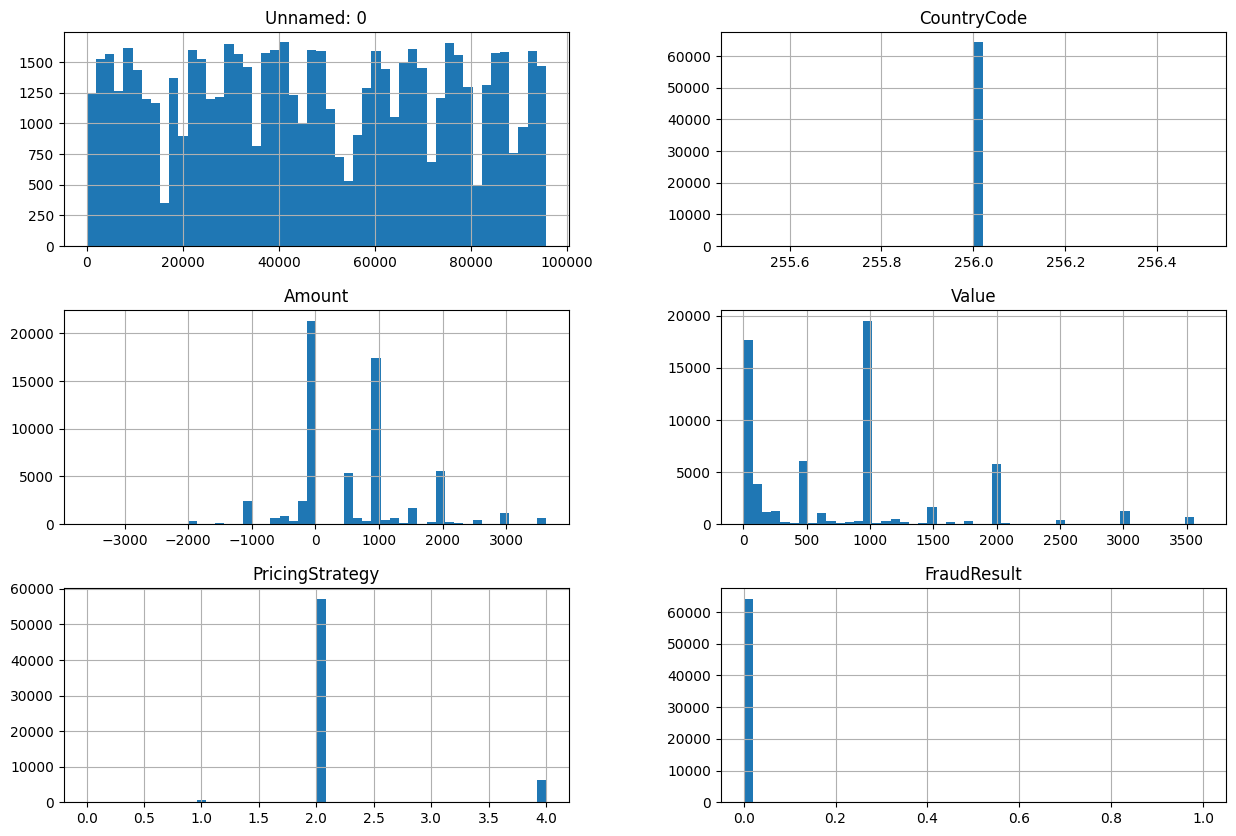

In [10]:
# distribution plots - Histograms
df1= df.select_dtypes(include = ['float64', 'int64'])
df1.hist(figsize = (15, 10), bins = 50);

In [21]:
# Selecting only numeric variables
df3 = df.select_dtypes(include=['number'])
df3.head()

,Unnamed: 0,CountryCode,Amount,Value,PricingStrategy,FraudResult
0,0,256,1000.0,1000,2,0
1,1,256,-20.0,20,2,0
2,2,256,500.0,500,2,0
3,4,256,-644.0,644,2,0
4,5,256,2000.0,2000,2,0


In [22]:
df3.corr()

,Unnamed: 0,CountryCode,Amount,Value,PricingStrategy,FraudResult
Unnamed: 0,1.000000,NaN,0.023005,0.023875,0.019413,0.004322
CountryCode,NaN,NaN,NaN,NaN,NaN,NaN
Amount,0.023005,NaN,1.000000,0.781980,0.074273,-0.005091
Value,0.023875,NaN,0.781980,1.000000,0.183647,-0.000306
PricingStrategy,0.019413,NaN,0.074273,0.183647,1.000000,-0.001619
FraudResult,0.004322,NaN,-0.005091,-0.000306,-0.001619,1.000000


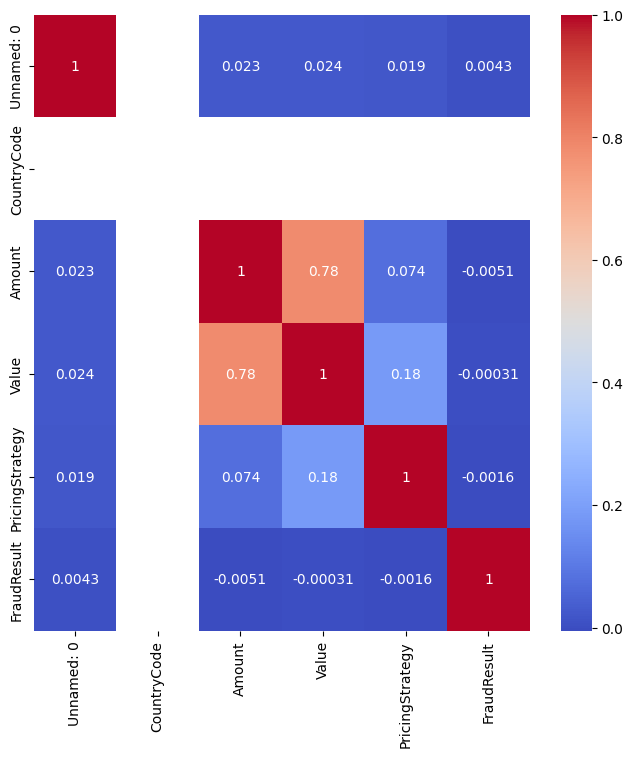

In [23]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df3.corr(),
            cmap = 'coolwarm',
            annot = True)